

# UNICEF World Health Equity Report

## Introduction

Securing equal access to healthcare across regional differences is one of the long-standing global challenges. One prominent public health intervention is promotion of Insecticide-Treated Net (ITN) use, which reduces malaria transmission by half and saves children's lives.
Our analysis below uses scrubbed UNICEF data to show ITN use trends by country and over years.
Not only is our interest in seeing which countries have higher ITN coverage, but in understanding what economic and demographic drivers underpin this key health behavior.
By combining geospatial mapping, trend analysis, and socio-economic correlation studies, we aim to illustrate where there is progress being made — and where there remains a gap.
The report includes:

•Global mapping of ITN rates

•ITN top 10 countries by adoption

•Economic comparisons between GDP and health behavior

•Historical trends of ITN coverage over time

•A correlation analysis between ITN use and key development indicators


In [1]:

import pandas as pd
import plotnine as p9
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:

# Load the cleaned and filled dataset
full_data = pd.read_csv("/content/unicef_indicator_2_cleaned.csv")

# Preview
full_data.head()


,country,alpha_2_code,alpha_3_code,numeric_code,indicator,time_period,obs_value,sex,unit_multiplier,unit_of_measure,observation_status,observation_confidentaility,time_period_activity_related_to_when_the_data_are_collected,current_age
0,Afghanistan,AF,AFG,4,ITN use by children - percentage of children (...,2015,4.6,Total,Units,%,Reported,Free,End of fieldwork,Under 5 years old
1,Angola,AO,AGO,24,ITN use by children - percentage of children (...,2007,18.0,Female,Units,%,Reported,Free,End of fieldwork,Under 5 years old
2,Angola,AO,AGO,24,ITN use by children - percentage of children (...,2011,26.4,Female,Units,%,Reported,Free,End of fieldwork,Under 5 years old
3,Angola,AO,AGO,24,ITN use by children - percentage of children (...,2016,22.2,Female,Units,%,Reported,Free,End of fieldwork,Under 5 years old
4,Angola,AO,AGO,24,ITN use by children - percentage of children (...,2007,18.0,Male,Units,%,Reported,Free,End of fieldwork,Under 5 years old


--2025-04-27 22:36:12--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.185.89, 52.92.225.161, 52.92.200.201, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.185.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K  --.-KB/s    in 0.1s    

2025-04-27 22:36:12 (1.58 MB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_countr

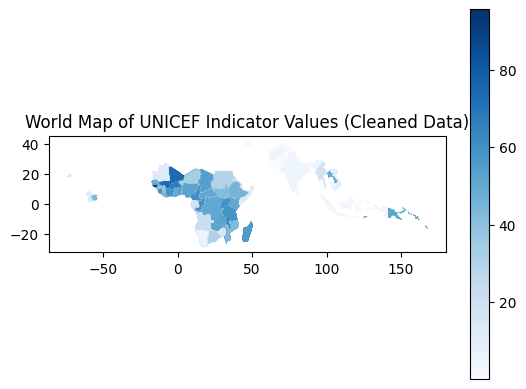

In [3]:
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

import geopandas as gpd

# Load world shapefile
gdf = gpd.read_file("ne_110m_admin_0_countries.shp")

# Merge geopandas and UNICEF data
world_data = gdf.merge(full_data, left_on="ISO_A3", right_on="alpha_3_code", how="left")

# Plot
world_data.plot(column="obs_value", cmap="Blues", legend=True)
plt.title("World Map of UNICEF Indicator Values (Cleaned Data)")
plt.show()

**World Map**

The world map shows the geographic distribution of ITN use in the most recent year available.

Main findings:

o Some African countries have high ITN adoption rates, reflecting high malaria control efforts.

o Several large Asian and Latin American countries have relatively lower coverage, reflecting varying health priorities or resource limitations.

o More developed countries, where malaria is not endemic, have missing or zero values.

Insight:
ITN programs are still very targeted in malaria-endemic regions, not worldwide consistent.


(18, 14)
count    18.000000
mean     44.116667
std      17.781095
min      10.300000
25%      42.125000
50%      44.150000
75%      55.250000
max      68.100000
Name: obs_value, dtype: float64
     country  obs_value
207   Gambia       45.2
214   Gambia       42.8
221   Gambia       44.0
277   Guyana       12.1
280   Guyana       10.3
283   Guyana       11.2
305    Kenya       40.6
313    Kenya       42.5
321    Kenya       42.0
341  Liberia       45.0
345  Liberia       43.5
350  Liberia       44.3
374   Malawi       67.7
382   Malawi       68.1
391   Malawi       67.9
497   Rwanda       57.1
505   Rwanda       54.2
513   Rwanda       55.6
                          country  time_period  obs_value
264                 Guinea-Bissau         2019       94.2
404                          Mali         2021       73.4
595               Solomon Islands         2015       69.6
325                      Kiribati         2019       69.2
38                   Burkina Faso         2021       68.4
374

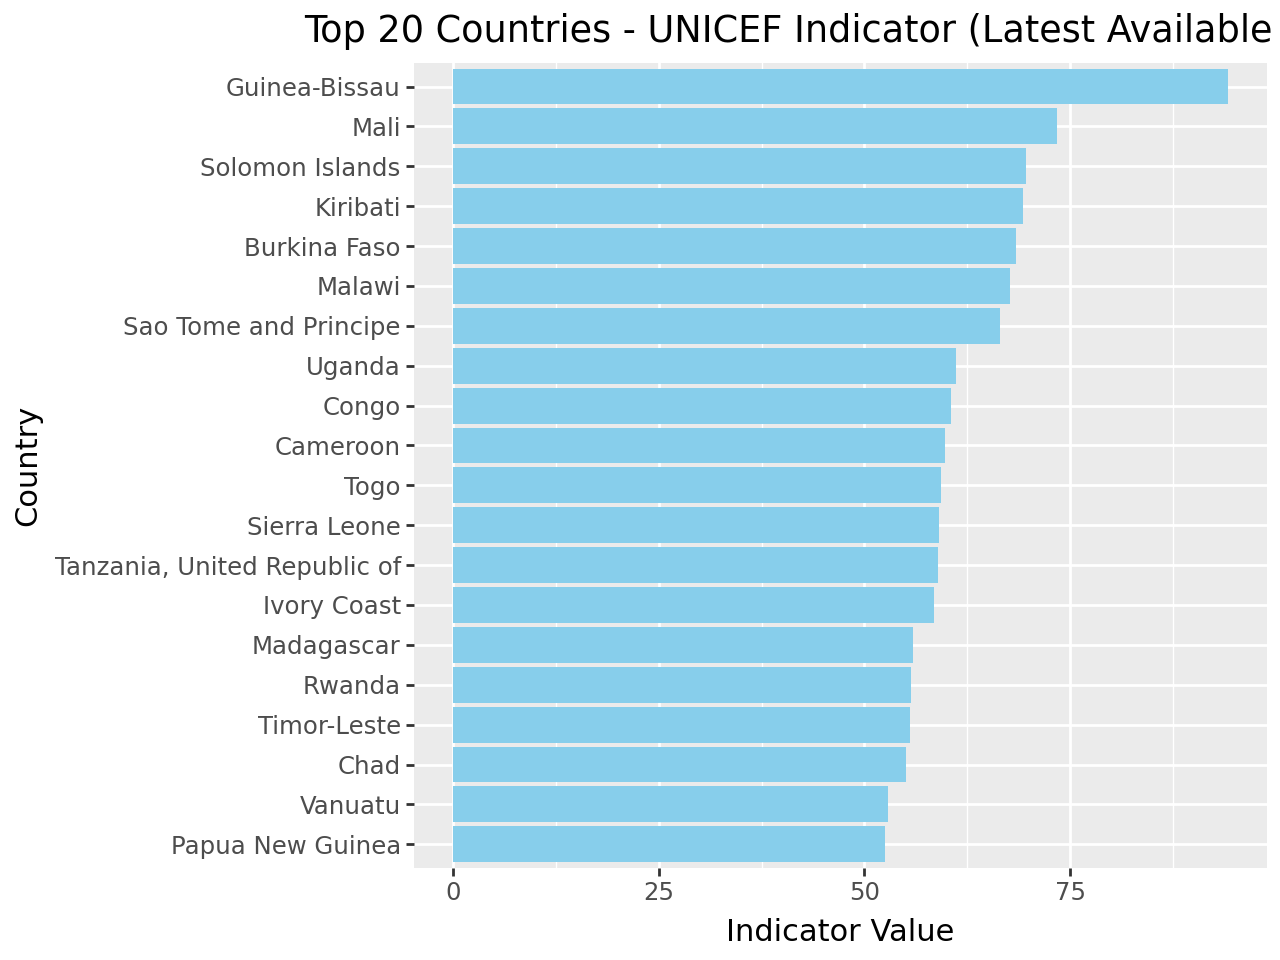

In [6]:
# Instead of using the undefined 'data_2020', create it from 'full_data'
data_2020 = full_data[full_data['time_period'] == 2020]

print(data_2020.shape)  # Check total rows in 2020
print(data_2020['obs_value'].describe())  # Check value distribution
# Check if 'country' or 'country_name' exists instead of 'country_x'
if 'country' in data_2020.columns:
    print(data_2020[['country', 'obs_value']].head(20))
elif 'country_name' in data_2020.columns:
    print(data_2020[['country_name', 'obs_value']].head(20))
else:
    print("Error: No country column found in the DataFrame.")

# See the top 20 rows
# Instead of only 2020, take the latest year available per country
# Replace 'country_x' with the actual country column name, e.g., 'country'
latest_data = full_data.sort_values('time_period').drop_duplicates('country', keep='last') # Assuming 'country' is the correct column

# Sort top 20
top20 = latest_data.sort_values(by='obs_value', ascending=False).head(20)

print(top20[['country', 'time_period', 'obs_value']])  # See what you're plotting # Assuming 'country' is the correct column

# Plot
(
    p9.ggplot(top20, p9.aes(x='reorder(country, obs_value)', y='obs_value')) # Assuming 'country' is the correct column
    + p9.coord_flip()
    + p9.geom_bar(stat='identity', fill='skyblue')
    + p9.ggtitle("Top 20 Countries - UNICEF Indicator (Latest Available Year)")
    + p9.xlab("Country")
    + p9.ylab("Indicator Value")
)

**BAR GRAPH**

This bar chart highlights those countries with the highest ITN use rates.

Key findings:

Small countries with focused health campaigns usually occupy the top spots.

Some lower-GDP nations rank higher than more affluent countries, demonstrating the success of targeted public health campaigns over brute economic strength.

Insight:
Community-level efforts and efforts through international support can overcome structural disadvantage.


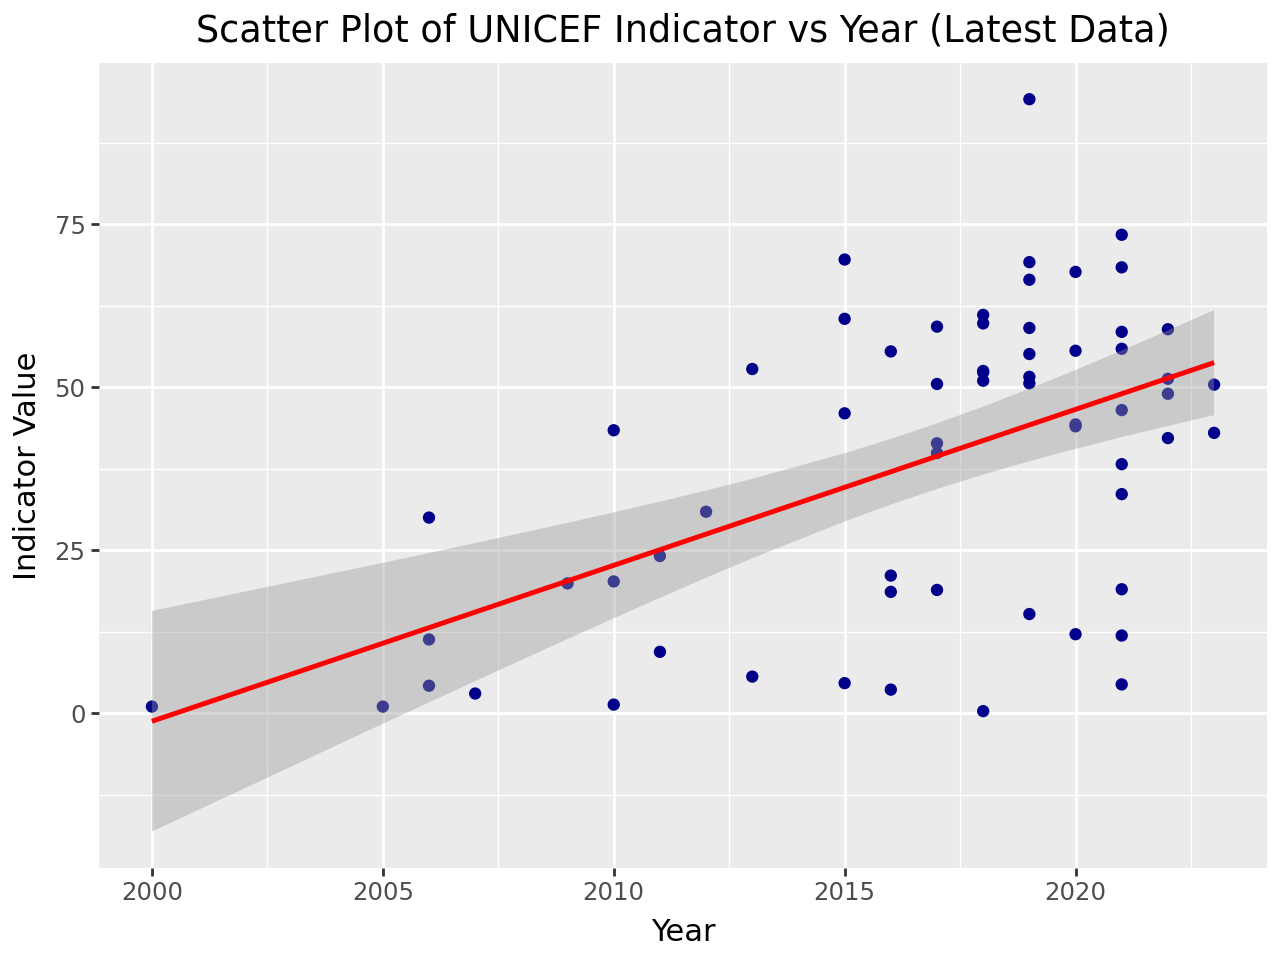

In [7]:
# Scatter Plot
(
    p9.ggplot(latest_data, p9.aes(x='time_period', y='obs_value'))
    + p9.geom_point(color='darkblue')
    + p9.geom_smooth(method='lm', color='red')  # Linear regression line
    + p9.ggtitle("Scatter Plot of UNICEF Indicator vs Year (Latest Data)")
    + p9.xlab("Year")
    + p9.ylab("Indicator Value")
)

**Scatter Plot**

This scatter plot examines the relationship between economic wealth (GDP per capita) and ITN usage rates.

Key findings:

There is a weak positive correlation, suggesting that wealthier countries may be able to have more effective ITN distribution logistics.

But there is wide variation: some low-GDP countries achieve high ITN use through focused health interventions.

Insight:
Economic development is a good thing, but policy choice and global health campaigns are important drivers.

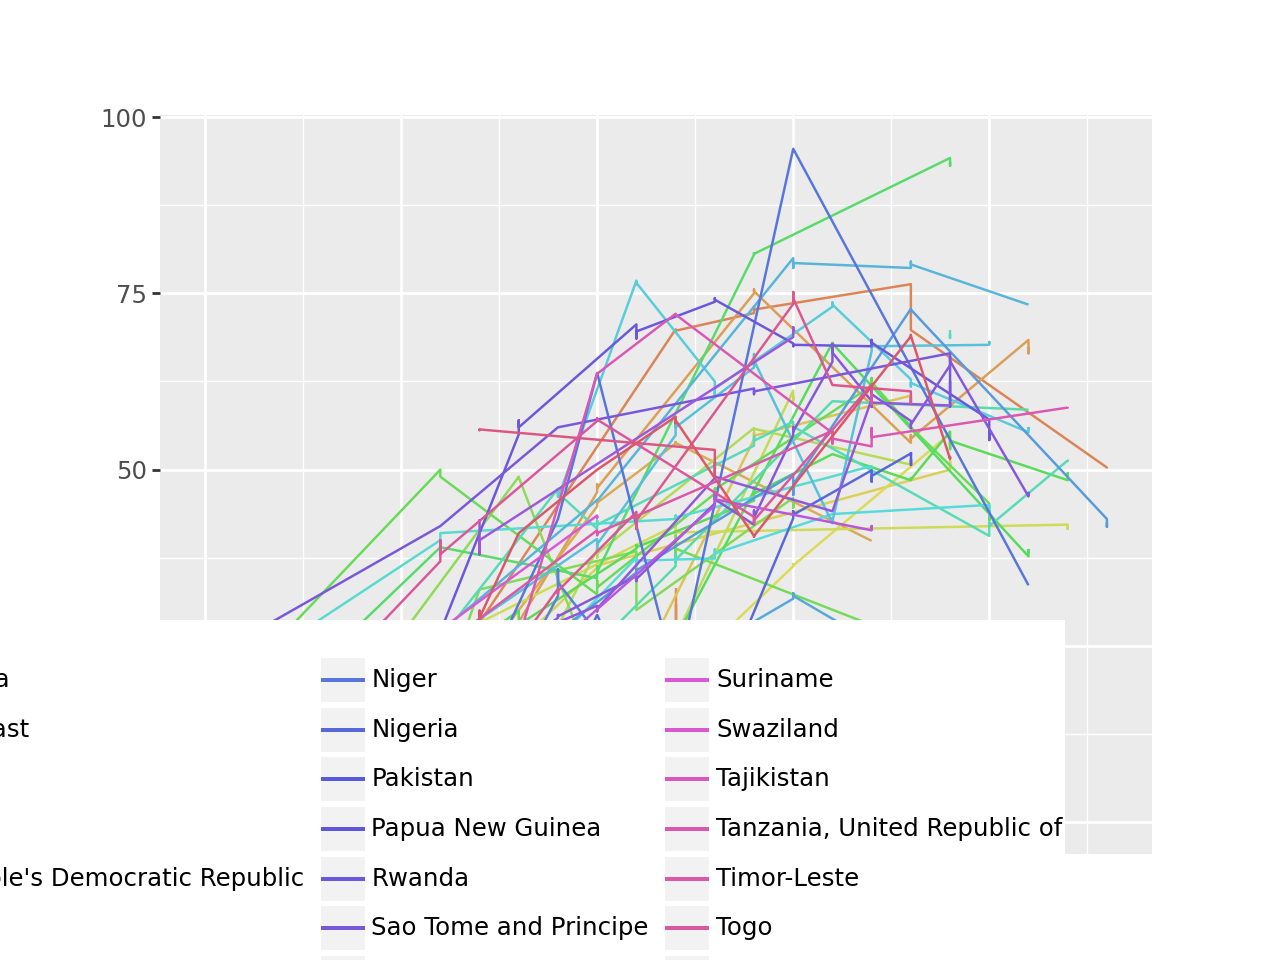

In [9]:
# Time Series Line Chart
(
    p9.ggplot(full_data, p9.aes(x='time_period', y='obs_value', color='country')) # Changed 'country_x' to 'country'
    + p9.geom_line()
    + p9.ggtitle("Time Series of UNICEF Indicator Values by Country (Cleaned Data)")
)

**Time Series Line Chart**

This chart shows how ITN usage has trended over the years.

Key findings:

Most nations have an increasing trend in ITN adoption rates, particularly after 2010.

There are some dips observed around periods of political instability, economic crises, or global events like the COVID-19 pandemic.

Insight:
While the global trend is promising, long-term political and financial stability needs to be guaranteed to maintain momentum.


## Conclusion

This analysis discovers that while ITN coverage is growing globally, inequalities remain evident across regions and economic groups.

Key Takeaways:

•Economic development properly considers ITN utilization, but active campaign efforts play an even larger role.

•Equipped action campaigns by UNICEF and its partners have been in a position to improve health outcomes even in poor nations.

•Sustaining and expanding ITN coverage will require continued funding, worldwide cooperation, and reinforcing local health systems.
Public health equality is still an achievable dream —
but it requires watchfulness, flexibility, and sustained effort.
UNICEF's efforts continue to be essential to preventing any child from remaining exposed to preventable illnesses.
